In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('NAO.jpg')

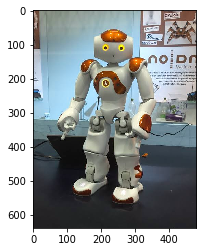

In [3]:
plt.imshow(img)

In [4]:
kernel_idn = np.array([[0,0,0],[0,1,0],[0,0,0]])

In [5]:
kernel_idn

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [6]:
%%html
<a href="http://setosa.io/ev/image-kernels/">Image_Kernels_efect_seeing_website</a>

In [7]:
#http://setosa.io/ev/image-kernels/.....website ...to see ki hota kya  h...kernel transformation
kernel_5 = np.ones((5,5),dtype=np.float32)/25.0  #normalised matrix...as 25 ones..and division by 25...total sum of
#all elements in matrix should be 1
#bluring in nothing but averaging of pixels

In [8]:
kernel_5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [9]:
kernel_10 = np.ones((10,10),dtype=np.float32)/100.0

In [10]:
kernel_10

array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]],
      dtype=float32)

In [11]:
output = cv2.filter2D(img,-1,kernel_idn)

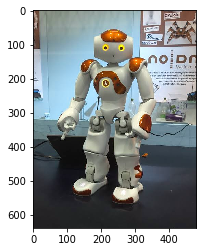

In [12]:
plt.imshow(output)

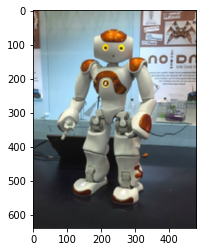

In [13]:
output2 = cv2.filter2D(img,-1,kernel_5)
plt.imshow(output2)

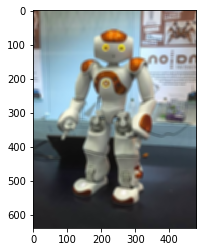

In [14]:
output3 = cv2.filter2D(img,-1,kernel_10)
plt.imshow(output3)

In [15]:
img.shape

(639, 480, 3)

In [16]:
rows,cols = img.shape[:2]

directional blurring

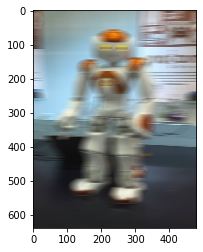

In [17]:
#horizontal blurring.....no of rows must be 1
kernel_horizontal = (np.ones((6,6),dtype=np.float32)/36).reshape(1,-1)
output4 = cv2.filter2D(img,-1,kernel_horizontal)
plt.imshow(output4)

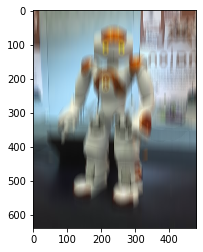

In [18]:
#vertical blurring....no of cols must be 1
kernel_vertical = (np.ones((6,6),dtype=np.float32)/36).reshape(-1,1)
output4 = cv2.filter2D(img,-1,kernel_vertical)
plt.imshow(output4)

every kernel should be normalised...sum of all  elements must be one

sharpen

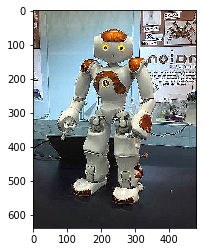

In [19]:
#sharpen
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
output4 = cv2.filter2D(img,-1,kernel_sharpen)
plt.imshow(output4)

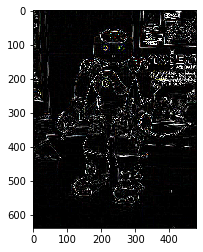

In [20]:
#edge detection kernel
kernel_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])  #outline kernel k elements  ka sum 0 h....outline kernel
output4 = cv2.filter2D(img,-1,kernel_edge)                 #normalised nhi hota
plt.imshow(output4)

sharpening me beech wale box ko popped up krwana h ....blurring me kyunki average hota tha...mtlb wahan pop up nhi hota tha
isliye sharpening is opposite of blurring

The difference is, while contrast enhancement is a global operation 
(ie., it is applied to the whole image, though it can of 
course also be restricted to areas of interest), sharpening is a local operation which affects borders and edges.                                                                     

# Video processing

In [21]:
cap  = cv2.VideoCapture(0)

_ , frame = cap.read()

cap.release()

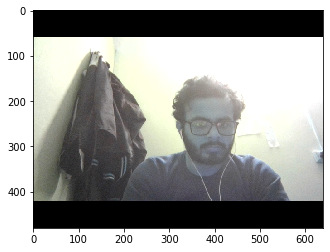

In [22]:
plt.imshow(frame)

In [23]:
cv2.imwrite("My.jpg",frame)

True

In [24]:
cap  = cv2.VideoCapture(0)

while True:
    _ , frame = cap.read()
    
    cv2.imshow("Webcam",frame)
    
    c = cv2.waitKey(1)
    
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [25]:
#blured video
cap  = cv2.VideoCapture(0)

while True:
    _ , frame = cap.read()
    kernel_vertical = (np.ones((6,6),dtype=np.float32)/36).reshape(-1,1)
    frame = cv2.filter2D(frame,-1,kernel_vertical) 
    cv2.imshow("Webcam",frame)
    
    c = cv2.waitKey(1)
    
    if c == 27:   #27 is for escape
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# #aim: video me sine wave
# import numpy as np
# import cv2
# import math


# cap  = cv2.VideoCapture(0)

# while True:
#     _ , frame = cap.read()
#     rows,cols = frame.shape[:2]
#     frame_output = np.ones(frame.shape)
#     for i in range(rows):
#         for j in range(cols):
#             offset_y = int(80.0*math.sin(2*3.148*j/180))
#             offset_x = 0

#         if i+offset_y < rows:
#             frame_output[i,j] = frame[(i+offset_y),j]
#         else:
#              frame_output[i,j] = 0
#     cv2.imshow("Webcam",frame_output)
    
#     c = cv2.waitKey(1)
    
#     if c == 27:   #27 is for escape
#         break

# cap.release()
# cv2.destroyAllWindows()         
# #not working

In [26]:
#change blur level by +/- keystrokes
import numpy as np
import cv2       

cap  = cv2.VideoCapture(0)
n = 6 
while True:
    _ , frame = cap.read()
          
            
   
        
    if n > 0 :       
        kernel_vertical = (np.ones((n,n),dtype=np.float32)/(n**2)).reshape(-1,1)
        frame = cv2.filter2D(frame,-1,kernel_vertical) 
        cv2.imshow("Webcam",frame)
    else:
        kernel_idn = np.array([[0,0,0],[0,1,0],[0,0,0]])
        frame = cv2.filter2D(frame,-1,kernel_idn) 
        cv2.imshow("Webcam",frame)
        n=1
        
    c = cv2.waitKey(1)     
    
    if c == 27:   #27 is for escape
        break
            
    if c == 43: # +
        n += 1
            
    if c == 45: # -
        n -= 1    
    
      
cap.release()
cv2.destroyAllWindows()


In [ ]:
#assgn ...keystroke s ...save frame...all sharp,blur combined...+,-

In [1]:
import numpy as np
import cv2

cap  = cv2.VideoCapture(0)

while True:
    _ , frame = cap.read()
    kernel_idn = np.array([[0,0,0],[0,1,0],[0,0,0]])
    frame = cv2.filter2D(frame,-1,kernel_idn) 
#     frame_copy = frame
    cv2.imshow("Webcam",frame)
    
    ch1 = cv2.waitKey(1) 
    
    if ch1 == 32:
        cv2.imwrite("Saved_frame.jpg",frame)
        
    elif ch1 in [115,83]:   #s,S
        
        n = 6
        while True:
            if n > 0:
                _ , frame_copy = cap.read()
                kernel_sharpen = np.array([[0,-n,0],[-n,(4*n+1),-n],[0,-n,0]])
                output_frame = cv2.filter2D(frame_copy,-1,kernel_sharpen)
                cv2.imshow("Webcam",output_frame)
                
            else:
                kernel_idn = np.array([[0,0,0],[0,1,0],[0,0,0]])
                frame = cv2.filter2D(frame,-1,kernel_idn) 
                cv2.imshow("Webcam",frame)
                n=1 

            c1 = cv2.waitKey(1)     
            
            if c1 == 27:
                break

            if c1 == 43: # +
                 n += 1

            if c1 == 45: # -
                 n -= 1 
            
            if c1 == 32:
                cv2.imwrite("Saved_frame.jpg",output_frame)
            
                
                    
            
    elif ch1 in [98,66]:    #b,B
        
        m = 6
        while True:
            
            if m > 0:
                _ , frame_copy = cap.read()
                kernel_vertical = (np.ones((m,m),dtype=np.float32)/(m**2)).reshape(-1,1)
                output_frame = cv2.filter2D(frame_copy,-1,kernel_vertical)
                cv2.imshow("Webcam",output_frame)
                
            else:
                kernel_idn = np.array([[0,0,0],[0,1,0],[0,0,0]])
                frame = cv2.filter2D(frame,-1,kernel_idn) 
                cv2.imshow("Webcam",frame)
                m=1    

            c2 = cv2.waitKey(1)
            
            if c2 == 27:
                break
            
            if c2 == 43: # +
                 m += 1

            if c2 == 45: # -
                 m -= 1  
                    
            if c2 == 32:
                cv2.imwrite("Saved_frame.jpg",output_frame) 
                
                    
            
    elif ch1 == 27:
        break
    
    

cap.release()
cv2.destroyAllWindows()

In [28]:
#dikhit soln
import cv2
import numpy as np
import math

cap = cv2.VideoCapture(0)
    
while True:
    _, frame = cap.read()
    
    grey_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rows, cols = grey_img.shape
    
    img_output = np.zeros(grey_img.shape)
    for i in range(rows):
        for j in range(cols):
            offset_x = int(80.0 * math.cos(2*3.14*i / 180))
            offset_y = 0

            if offset_x + j  < cols:
                img_output[i,j] = grey_img[i,(j+offset_x)]
            else:
                img_output[i,j] = 0
    
    cv2.imshow("webcam", img_output)
    
    c=cv2.waitKey(1)
    
    if c==43 :
        i=i+20
        kernel_10 = np.ones((1,10+i), dtype=np.float32)/(10+i)
        reshaped=kernel_10.reshape(-1,1)
        
    if c==45 and i>10:
        i=i-10
        kernel_10 = np.ones((1,i), dtype=np.float32)/i
        reshaped=kernel_10.reshape(-1,1)
        
    elif c== 27:
        break
        
cap.release()
cv2.destroyAllWindows()